# Simulation and real stats 

Explore the light curve baseline coverage, using the simulated light curves, since they reflect the r-band combined light curves.  Just for illustration purpose (Fig.3) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.patches as patches
import seaborn as sns 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import unique
from astropy.table import Column
from astropy.table import join
from astropy.time import Time
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

obsDir = '../dp2/sim_subsampled2/'
realDir = '../data_products/Combined_LC/'
realLcs =  os.listdir(realDir)

## Calculate the statistics  ... Takes about 2 mins  

**calculate** the extent of used light curves,  to find out the surveys extent (so that it's data-driven, reflecting the actual extent of the data I used ')

In [12]:
stats = {'lcname':[] }
segs = ['lsst', 'ps1',  'sdss', 'ztf', 'ptf', 'crts']
for s in segs: 
    for i in '12':
        stats['t'+i+s] = np.zeros(len(realLcs), dtype=int)
    
for i in range(len(realLcs)) : 
    if i % 1000 == 0 : print(i)
    lcname = realLcs[i]
    lc_obs = Table.read(obsDir+lcname, format='ascii',)
    stats['lcname'].append(lcname)
    for s in segs : 
        m = lc_obs['originSurvey'] == s
        if np.sum(m) > 0 : 
            stats['t1'+ s ][i] = min(lc_obs[m]['mjd'])
            stats['t2'+ s ][i] = max(lc_obs[m]['mjd'])
fname = 'sim_subsampled2_baselines'
np.save(fname, stats)

0
1000
2000
3000
4000
5000
6000


## PRODUCTION : Make Fig.2 (SURVEY BASELINE ILLUSTRATION)

**load ** the previously carried out calculations .... 

In [2]:
fname = 'sim_subsampled2_baselines.npy'
stats = np.load(fname).item()
st = Table(stats)

In [3]:
%matplotlib inline
#Below I'm essentially reporting the 1st percentile of the start time
#and 99th percentile of the end time 
# as the x - position 
seg = 'sdss-ps1-ptf-crts-lsst-ztf'
for s in seg.split("-"):
    print(s, ' extent: ', np.percentile(st['t1'+s], 1), '-', np.percentile(st['t2'+s],99))

sdss  extent:  51075.0 - 54415.0
ps1  extent:  55028.0 - 56586.0
ptf  extent:  55007.0 - 56986.0
crts  extent:  53481.0 - 56565.0
lsst  extent:  59961.0 - 63586.0
ztf  extent:  58119.0 - 58476.0


190717 : update - adding thick line to the bottom of the rectangle to signify $m_{5}$

191010: update - make the thick line black and dashed.

sdss 0 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
ps1 1 (1.0, 0.4980392156862745, 0.054901960784313725)
ptf 2 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
crts 3 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
lsst 4 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
ztf 5 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
sdss 51075 22.2 3340 1.4555
crts 53481 20.5 3084 3.3000000000000003
ptf 55007 20.7 1979 3.0
ps1 55028 21.8 1558 3.0
lsst 59961 24.7 3625 2.5
ztf 58119 20.6 357 2.65


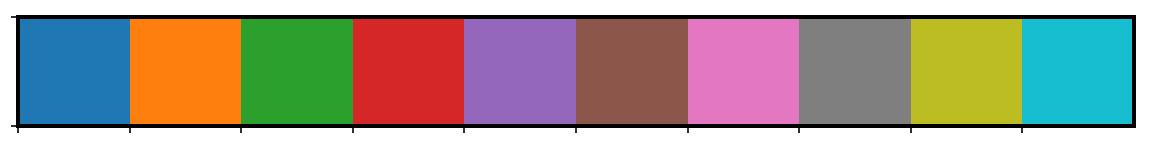

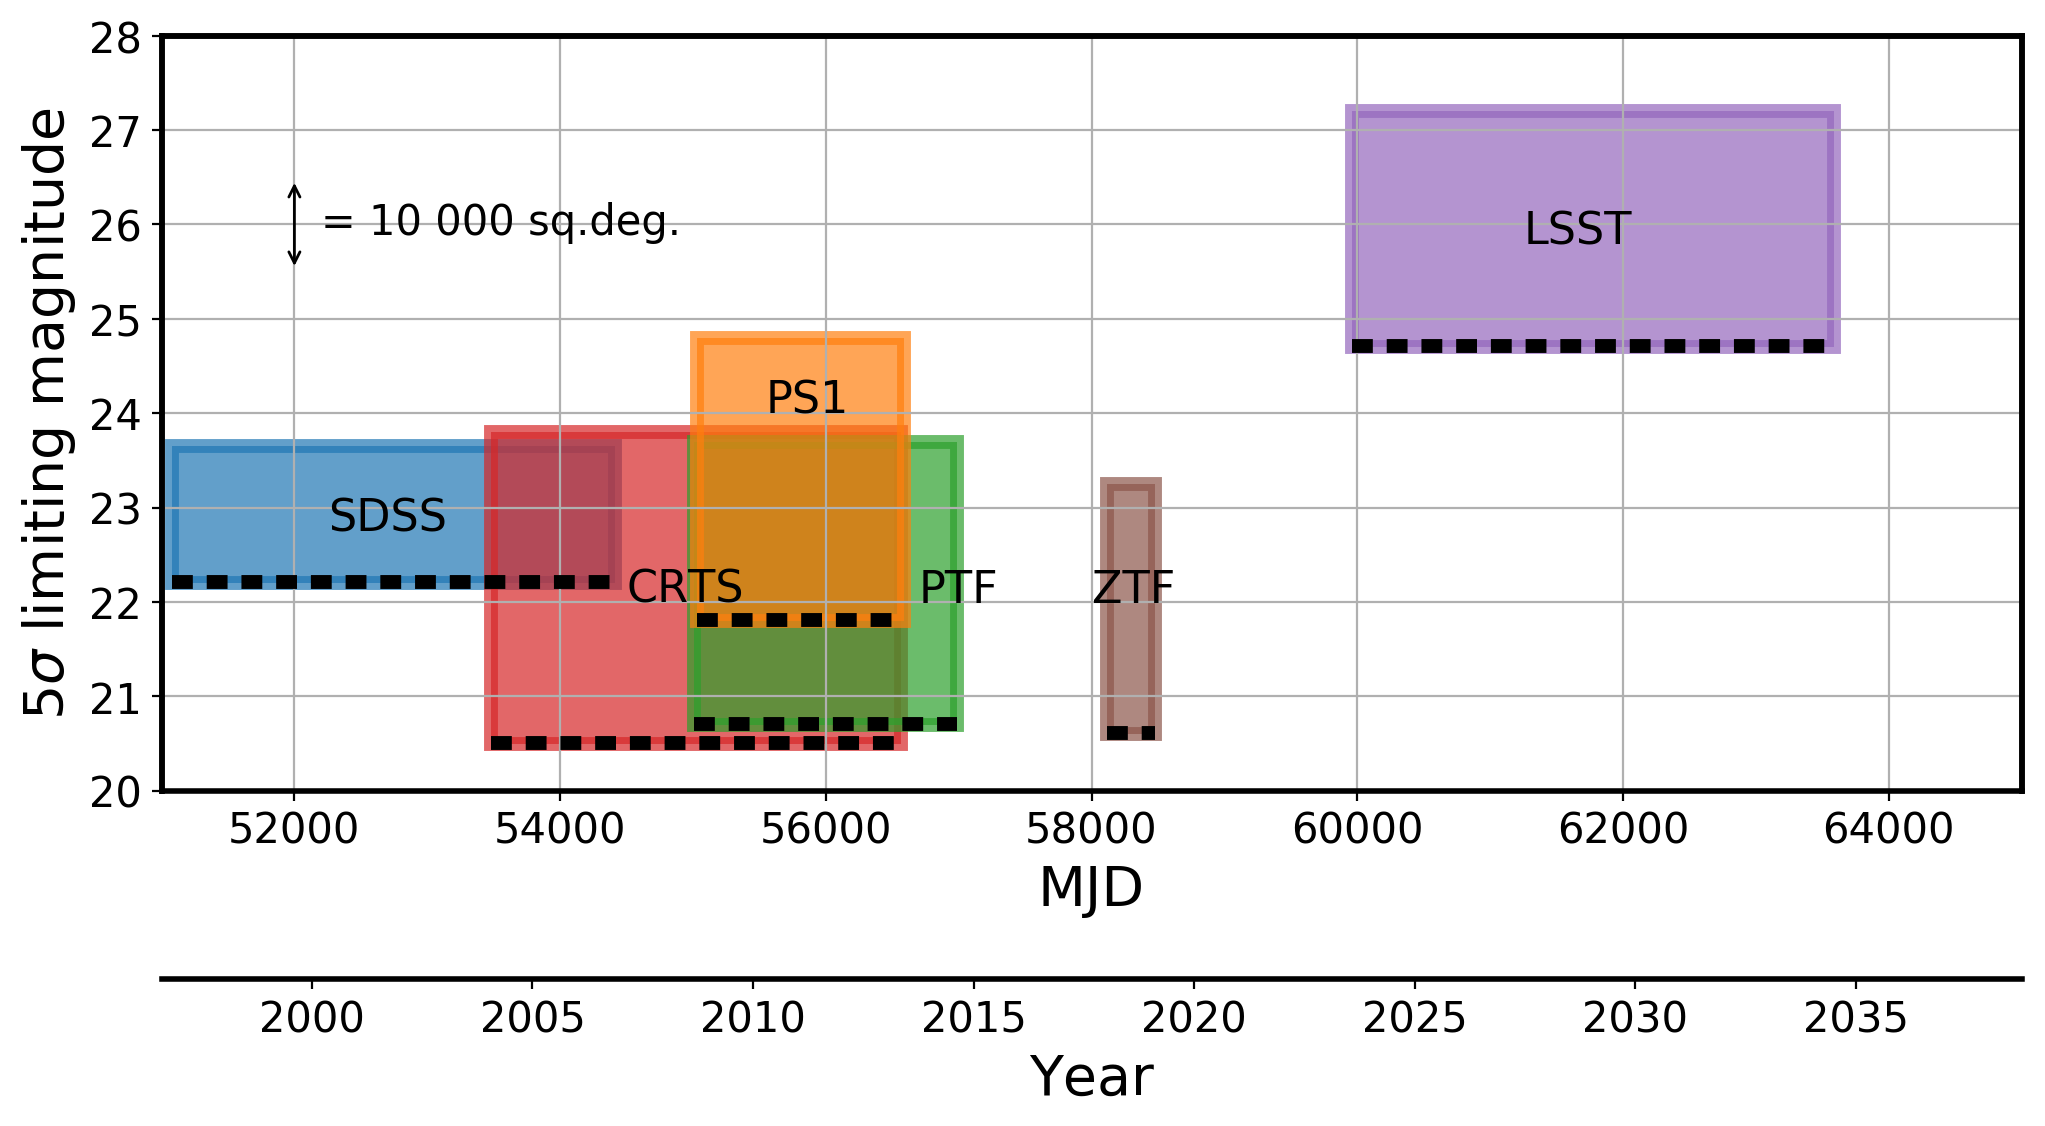

In [23]:
# Make the plot showing the coverage ...
%matplotlib inline

# assign colors to surveys using seaborn palette
%config InlineBackend.figure_format='retina'
current_palette = sns.color_palette()
sns.palplot(current_palette)

seg = 'sdss-ps1-ptf-crts-lsst-ztf'
cdic = {}
for i, s in enumerate(seg.split("-")):
    color = current_palette[i] 
    print(s,i,color)
    cdic[s]= color 
    
# vertical position : 
# corresponding  to the limiting 5-sigma depth in single exposure,
# r-band 
ypos = {'sdss' : 22.2 , 'crts': 20.5,  'ps1':21.8,  'ptf':20.7,  'ztf':20.6, 
        'lsst':24.7}

# vertical width :
# corresponding to teh sky area covered by the survey ,
# in sq.deg. 
yheight = {'sdss':14555 , 'crts':33000, 'ps1':30000, 'ptf':30000,
           'ztf': 26500 , 'lsst':25000}

# horizontal position along x-axis : extent of a survey in mjd 
xpos  = {'sdss':[51075, 54415], 'ps1':[55028, 56586], 
         'crts':[53481, 56565], 'ptf':[55007, 56986], 
         'ztf':[58119, 58476], 'lsst':[59961, 63586]}


fig,ax = plt.subplots(1,1,figsize=(12,5), dpi=100)

seg = 'sdss-crts-ptf-ps1-lsst-ztf'


xytext = {'sdss':[52250,22.75], 'crts':[54500,22], 'ps1':[55550, 24],
         'ptf':[56700, 22], 'ztf':[58000, 22], 'lsst':[61250,25.8]}
for i, s in enumerate(seg.split("-")):
    # Create a Rectangle patch: Rectangle((xmin, ymin), width, height) 
    xmin = xpos[s][0]
    ymin = ypos[s]
    width = xpos[s][1] - xmin
    height = yheight[s] * 0.0001 # scale since otherwise would be problems
    print(s, xmin,ymin,width,height)
    rect = patches.Rectangle((xmin,ymin),width,height, linewidth=5, ec = cdic[s],
                             facecolor=cdic[s], alpha=0.7)
    ax.add_patch(rect)
    
    # annotate the surveys ... 
    ax.text(xytext[s][0],xytext[s][1], s.upper(),
           fontsize=16)
    
    # add a thick line at the bottom...
    dx = 0 # offset along x 
    dy = 0.01 # offset along y 
    ax.plot([xmin+dx,xmin+width-dx], [ymin+dy, ymin+dy], lw=5, c = 'k',
            dashes = (1.5,1.), ls='--')#cdic[s])
    #https://stackoverflow.com/questions/35099130/change-spacing-of-dashes-in-dashed-line-in-matplotlib
    #https://stackoverflow.com/questions/33936134/are-there-really-only-4-matplotlib-line-styles
    #dashes=(length, interval space)
    
    
    
# draw a vertical arrow with a width corresponding to 
# 1, i.e. 10000 sq. deg. (because I divided all 
# rectangle heights that were originally in sq.deg. by 10000)
xmin,ymin = 52000, 25.5
xmax,ymax = xmin, ymin+1
ax.annotate(s='', xy=(xmax,ymax ), xytext=(xmin,ymin ), 
            arrowprops=dict(arrowstyle='<->'))
ax.text(xmin+200, ymin+0.4, '= 10 000 sq.deg.', fontsize=15)

ax.set_xlim(51000,65000)
ax.set_ylim(20,28)
ax.set_ylabel(r'$5 \sigma$'+' limiting magnitude')

ax.grid()

ax.set_xlabel('MJD')

# store xlims, ylims for the original axis 
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# make another axis with years ... 
ax2 = ax.twiny()

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
#for sp in ax2.spines.items():
#    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

#ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("Year")

mjd = np.linspace(xlims[0], xlims[1], 10)
t = Time(mjd, format='mjd')
ax2.plot_date(t.datetime, np.zeros(len(t)), markersize=0)
ax2.set_ylim(ylims)
ax2.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
#fig.autofmt_xdate()
#ax.yaxis.set_major_formatter(plt.NullFormatter())
#ax.set_yticks([])
plt.savefig('lightcurves_extent.png', bbox_inches='tight')

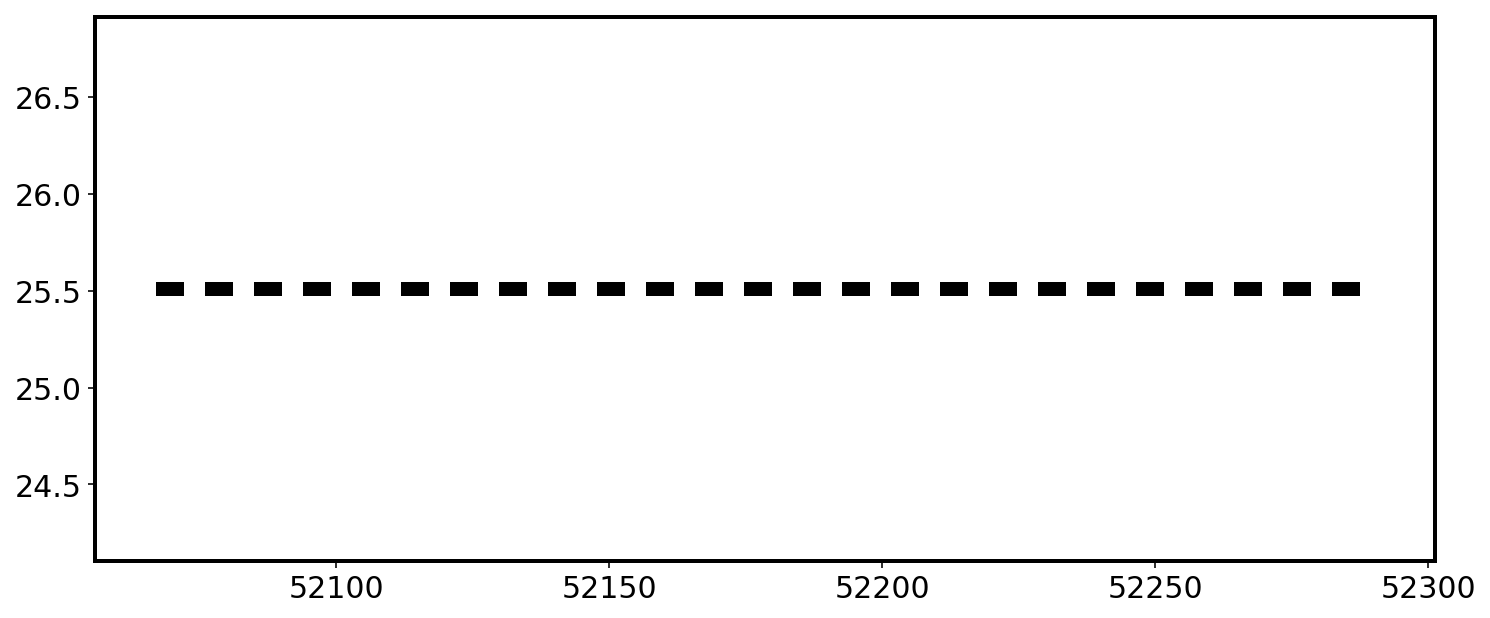

In [18]:
fig,ax = plt.subplots(1,1,figsize=(12,5),)# dpi=50)


ax.plot([xmin+dx,xmin+width-dx], [ymin+dy, ymin+dy], lw=7, c = 'k',
            dashes = (2,1.5), ls='--')